In [1]:
# Import librabry
import os
import re
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from num2words import num2words
import spacy
from deep_translator import GoogleTranslator
from underthesea import text_normalize, classify, sentiment
from wordcloud import WordCloud
import emoji

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Read file
cleaned_comment = pd.read_csv(os.path.join(os.path.dirname(os.getcwd()), "data", "preprocessed", "preprocessed_comment" ,"cleaned_comment_20240408_2129.csv"))

In [2]:
cleaned_comment[["content_comment", "joined_comment", "sentiment_label", "aspect_label"]]

,content_comment,joined_comment,sentiment_label,aspect_label
0,"Giao lâu, chất lượng + đóng gói oke",long quality packaging ok,positive,store
1,"thích em này thật sự, mùi thơm thảo mộc, lành ...",like benign support,positive,smell
2,Toner này gần như ko mùi Dạng sệt thoa lên da ...,odorless thick consistency apply absorb smooth...,positive,texture
3,"Vô thưởng vô phạt, dễ chịu, không mùi Thiết kế...",innocuous pleasant odorless difficult lid design,negative,store
4,giao hàng nhanh với cả xài rất tốt í,fast good,positive,store
...,...,...,...,...
5495,"Dùng xong thấy tóc mềm mượt, màu lên ko rõ lắm...",feel soft smooth color clear worth money,neutral,smoothing
5496,Có nâng nền tóc r nhuộm vẫn fail chắc nhuộm đe...,raise color dye fail guess dye black,negative,others
5497,Tóc mình đen chưa qua nhuộm. Nhuộm màu đen khó...,black dye dye smoke black color black tea s su...,positive,smoothing
5498,"Mau tím đang thịnh nên mua dùng thử, vì là màu...",purple popular buy try safe color not standard...,neutral,others


In [3]:
# Read columns
print(cleaned_comment.columns)

# Drop columns
cleaned_comment = cleaned_comment.drop("Unnamed: 0.1", axis= 1)
cleaned_comment[["joined_comment", "sentiment_label", "aspect_label"]]

Index(['Unnamed: 0.1', 'Unnamed: 0', 'data_product_id', 'content_comment',
       'lower_comment', 'decoded_comment', 'translated_comment',
       'demojized_comment', 'standardlized_comment', 'cleaned_comment',
       'joined_comment', 'sentiment_label', 'aspect_label'],
      dtype='object')


,joined_comment,sentiment_label,aspect_label
0,long quality packaging ok,positive,store
1,like benign support,positive,smell
2,odorless thick consistency apply absorb smooth...,positive,texture
3,innocuous pleasant odorless difficult lid design,negative,store
4,fast good,positive,store
...,...,...,...
5495,feel soft smooth color clear worth money,neutral,smoothing
5496,raise color dye fail guess dye black,negative,others
5497,black dye dye smoke black color black tea s su...,positive,smoothing
5498,purple popular buy try safe color not standard...,neutral,others


In [4]:
# Count sentiment, aspect label
print(cleaned_comment["sentiment_label"].value_counts())
print("\n")
print(cleaned_comment["aspect_label"].value_counts())

sentiment_label
positive    4036
neutral      823
negative     641
Name: count, dtype: int64


aspect_label
texture      1394
others       1364
smoothing    1293
smell         844
store         604
Name: count, dtype: int64


In [5]:
# Slice data
positive_comments = cleaned_comment[cleaned_comment.sentiment_label == "positive"][:1000]
neutral_negative_comments = cleaned_comment[(cleaned_comment.sentiment_label == "neutral") | (cleaned_comment.sentiment_label == "negative")]

# Concat data
comment = pd.concat([positive_comments, neutral_negative_comments])

In [6]:
# Count sentiment, aspect label after slicing data
print(comment["sentiment_label"].value_counts())
print("\n")
print(comment["aspect_label"].value_counts())

sentiment_label
positive    1000
neutral      823
negative     641
Name: count, dtype: int64


aspect_label
others       675
texture      616
smoothing    460
store        380
smell        333
Name: count, dtype: int64


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_6652\1553618439.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="Blues")


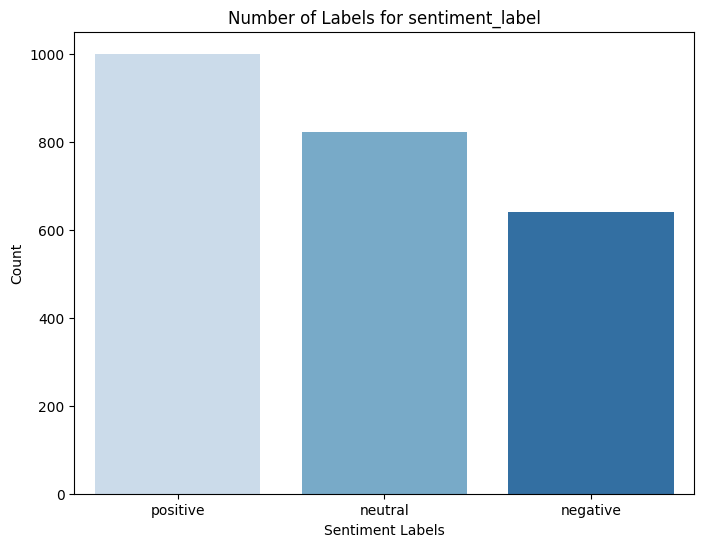

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_6652\1553618439.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=aspect_counts.index, y=aspect_counts.values, palette="Greens")


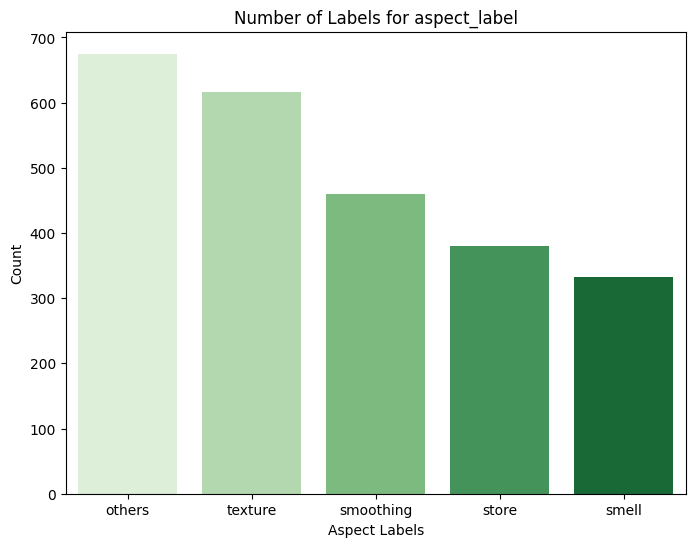

In [19]:
# Sentiment label counts
sentiment_counts = comment["sentiment_label"].value_counts()

# Plot for sentiment_label
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="Blues")
plt.title('Number of Labels for sentiment_label')
plt.xlabel('Sentiment Labels')
plt.ylabel('Count')
plt.show()

# Aspect label counts
aspect_counts = comment["aspect_label"].value_counts()

# Plot for aspect_label
plt.figure(figsize=(8, 6))
sns.barplot(x=aspect_counts.index, y=aspect_counts.values, palette="Greens")
plt.title('Number of Labels for aspect_label')
plt.xlabel('Aspect Labels')
plt.ylabel('Count')
plt.show()

In [8]:
# Split data into train, test
X_train, X_test, y_train_sentiment, y_test_sentiment, y_train_aspect, y_test_aspect = train_test_split(comment['cleaned_comment'], 
                                                                                                       comment['sentiment_label'], 
                                                                                                       comment['aspect_label'], 
                                                                                                       test_size=0.2, 
                                                                                                       random_state=42)

# Initialize and train the TF-IDF model
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [9]:
# Initialize and train the Logistic Regression model for sentiment_label
log_reg_model_sentiment = LogisticRegression()
log_reg_model_sentiment.fit(X_train_tfidf, y_train_sentiment)

# Initialize and train the Logistic Regression model for aspect_label
log_reg_model_aspect = LogisticRegression()
log_reg_model_aspect.fit(X_train_tfidf, y_train_aspect)

# Predict on the test set for sentiment_label
y_pred_sentiment = log_reg_model_sentiment.predict(X_test_tfidf)

# Predict on the test set for aspect_label
y_pred_aspect = log_reg_model_aspect.predict(X_test_tfidf)

# Evaluate the accuracy of the sentiment_label model
accuracy_sentiment = accuracy_score(y_test_sentiment, y_pred_sentiment)
print("Accuracy for sentiment_label model:", accuracy_sentiment)

# Evaluate the accuracy of the aspect_label model
accuracy_aspect = accuracy_score(y_test_aspect, y_pred_aspect)
print("Accuracy for aspect_label model:", accuracy_aspect)

Accuracy for sentiment_label model: 0.6937119675456389
Accuracy for aspect_label model: 0.59026369168357


In [10]:
# Calculate F1-score for sentiment_label
f1_score_sentiment = f1_score(y_test_sentiment, y_pred_sentiment, labels=["positive", "neutral", "negative"], average=None)
print("F1-score for sentiment_label:")
for label, score in zip(["positive", "neutral", "negative"], f1_score_sentiment):
    print(f"{label}: {score}")

# Calculate F1-score for aspect_label
f1_score_aspect = f1_score(y_test_aspect, y_pred_aspect, labels=["others", "texture", "smoothing", "store", "smell"], average=None)
print("\nF1-score for aspect_label:")
for label, score in zip(["others", "texture", "smoothing", "store", "smell"], f1_score_aspect):
    print(f"{label}: {score}")


F1-score for sentiment_label:
positive: 0.7609254498714653
neutral: 0.6503067484662577
negative: 0.6494464944649446

F1-score for aspect_label:
others: 0.6032786885245901
texture: 0.5682656826568265
smoothing: 0.527027027027027
store: 0.6461538461538461
smell: 0.6212121212121212


In [11]:
# Create dataframe for predictions with original comments
predictions_df = pd.DataFrame({
    'original_Comment': comment.loc[X_test.index, 'content_comment'],  # Get original comments based on X_test index
    'cleaned_Comment': X_test,  # Assuming X_test contains the cleaned comments
    'actual_Sentiment': y_test_sentiment,
    'predicted_Sentiment': y_pred_sentiment,
    'actual_Aspect': y_test_aspect,
    'predicted_Aspect': y_pred_aspect
})

In [12]:
# Print the dataframe
print("Predictions:")
predictions_df.tail()

Predictions:


,original_Comment,cleaned_Comment,actual_Sentiment,predicted_Sentiment,actual_Aspect,predicted_Aspect
3650,"Sản phẩm không màu , k nâng tông , dưỡng ẩm nh...","['colorless', 'enhance', 'tone', 'moisturize',...",negative,negative,others,texture
3658,"kcn thấm nhanh nhưng mà dễ bị xê dịch, trôi đi...","['absorb', 'quickly', 'easily', 'move', 'wash'...",neutral,negative,smell,smell
3401,Đã mua offline. Serum t thấy đặc hơn nước xíu....,"['buy', 'offline', 'feel', 'little', 'thick', ...",negative,negative,texture,texture
2425,E này gía có hơi cao. Nhg xài tốt. Chất kem lỏ...,"['bit', 'high', 'good', 'liquid', 'slight', 't...",neutral,positive,texture,texture
920,"chất dịu nhẹ, tẩy trang hằng ngày oke. không c...","['gentle', 'substance', 'ok', 'daily', 'remove...",neutral,positive,smell,smell


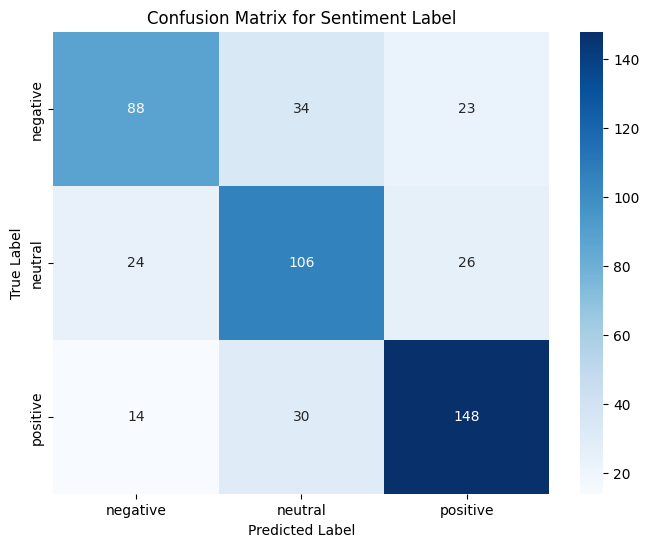

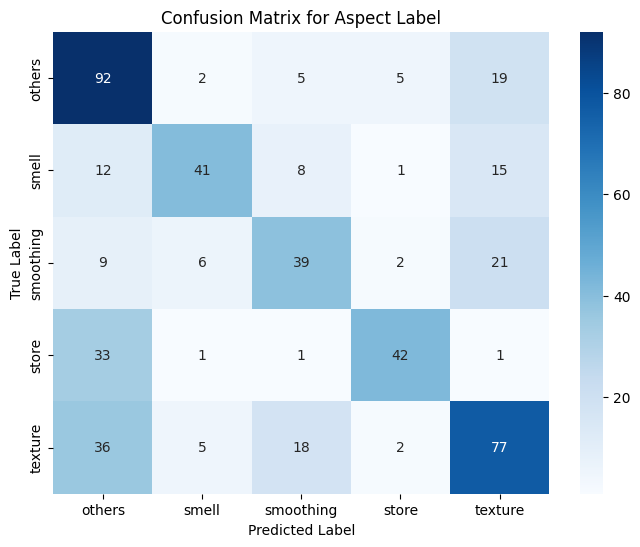

In [13]:
# Calculate confusion matrix for sentiment_label
conf_matrix_sentiment = confusion_matrix(y_test_sentiment, y_pred_sentiment)

# Plot confusion matrix for sentiment_label
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_sentiment, annot=True, fmt='d', cmap='Blues', xticklabels=log_reg_model_sentiment.classes_, yticklabels=log_reg_model_sentiment.classes_)
plt.title('Confusion Matrix for Sentiment Label')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Calculate confusion matrix for aspect_label
conf_matrix_aspect = confusion_matrix(y_test_aspect, y_pred_aspect)

# Plot confusion matrix for aspect_label
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_aspect, annot=True, fmt='d', cmap='Blues', xticklabels=log_reg_model_aspect.classes_, yticklabels=log_reg_model_aspect.classes_)
plt.title('Confusion Matrix for Aspect Label')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [14]:
from sklearn.metrics import classification_report

# Generate classification report for sentiment_label
classification_report_sentiment = classification_report(y_test_sentiment, y_pred_sentiment, labels=["positive", "neutral", "negative"])
print("Classification Report for sentiment_label:")
print(classification_report_sentiment)

# Generate classification report for aspect_label
classification_report_aspect = classification_report(y_test_aspect, y_pred_aspect, labels=["others", "texture", "smoothing", "store", "smell"])
print("\nClassification Report for aspect_label:")
print(classification_report_aspect)

Classification Report for sentiment_label:
              precision    recall  f1-score   support

    positive       0.75      0.77      0.76       192
     neutral       0.62      0.68      0.65       156
    negative       0.70      0.61      0.65       145

    accuracy                           0.69       493
   macro avg       0.69      0.69      0.69       493
weighted avg       0.70      0.69      0.69       493


Classification Report for aspect_label:
              precision    recall  f1-score   support

      others       0.51      0.75      0.60       123
     texture       0.58      0.56      0.57       138
   smoothing       0.55      0.51      0.53        77
       store       0.81      0.54      0.65        78
       smell       0.75      0.53      0.62        77

    accuracy                           0.59       493
   macro avg       0.64      0.58      0.59       493
weighted avg       0.62      0.59      0.59       493

